# Regresión Logística Multinomial

Algunas veces es necesario hacer clasificación para más de dos clases. Quizas se quiere clasificar tres formas de sentimientos (positivo, neutral o negativo). Esto se podría hacer analizando el contenido del habla y asignado un etiquetado semático a cada una de las palabras para poder valores el sentimiento del habla, sin embargo en esta publicación no vamos a hablar de esto por ahora. Vamos a dedicar la atención a la regresión logística multinomial o softmax.

En estas situaciones en donde es necesario hacer una clasificación para más de dos clases, se puede hacer uso de la **regresión logística multinomial**, o tambien **regresión softmax**. En este tipo de regresión la variable objetivo tiene un rango que varia sobre un conjunto de más de dos clases; el objetivo aquí será determinar cuá es la probabilidad de $y$ de pertenecer a cada una de las clases potenciales $c\in C$, $P(y=c\;|\;x)$.

La regresión logística multinomial clasifica usando una generalización de la función sigmoide, conocida como la función **softmax**, para calcular la probabilidad $P(y=c\;|\;x)$. La función softmax toma un vector $z=[z_1, z_2, \dots, z_k]^{\top}$ de $k$ valores arbitrarios y los mapea en una distribucción de probalicada, con cada valore en el rango $(0, 1)$, y todos los valores sumando uno. Como la función sigmoide. es una función exponencial.

Para un vector $z$ de dimensionalidad $k$, la función softmax es definida como:

$$s(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_{j}}},\; 1\leq i\leq k.$$

Así, la función softmax de un vector $z=[z_1, z_2, \dots, z_k]^{\top}$ es por lo tanto una función vectorial:

$$s(z)=\left[\frac{e^{z_1}}{\sum_{j=1}^{k}e^{z_{1}}}, \frac{e^{z_2}}{\sum_{j=1}^{k}e^{z_{2}}},\dots, \frac{e^{z_k}}{\sum_{j=1}^{k}e^{z_{k}}}\right]$$

El denominador $\frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_{j}}}$ es usado para normalizar todos los valores en probabilidades. Por ejemplo:

In [1]:
import numpy as np
from scipy.special import softmax

In [2]:
z = np.array([0.6, 1.1, -1,5, 1.2, 3.2, -1.1])

In [3]:
softmax(z)

array([0.01002305, 0.01652522, 0.00202362, 0.81638616, 0.01826319,
       0.13494772, 0.00183105])

Otra vez como en la función sigmoide, la entrada de la función softmax puede ser el producto punto entre un vector de pesos $w=(w_0, \dots, w_n)$ y un vector $x=(1, x_1,\dots, x_n$. Pero ahora ese necesario separar el vector de pesos para cada una de las clases.

$$P(y=c\;| \;x)=\frac{e^{w_c^\top x}}{\sum_{j=1}^{k}e^{w_j^\top x}}$$

Como la función sigmoide, la función softmax tiene la propiedad de transformar los valores hacía $0$ o $1$. Pos lo tanto , si una de las entradas es más grande que los otros, tenderá a aumentar su probabilidad hacia $1$, y suprime las probabilidades de las entradas más pequeñas.

## Aplicaciones de la regresión logística multinomial

Para la clasificación de los datos de entrada es necesario definir una función que depende de la observación $x$ y de la potencial clase $c$. Para esto se usará la notación $f_i(c, x)$, que indicará el atributo $i$ para una clases particular $c$ dado por la observación $x$.

En clasificación binaria, un peso positivo en una característica apunta hacia $y = 1$ y
un peso negativo hacia $y = 0$, pero en la clasificación multiclase una característica podría ser
evidencia a favor o en contra de una clase individual.

Veamos algunas características de muestra para algunas tareas de PNL para ayudar a comprender este uso quizás poco intuitivo de características que son funciones tanto de la observación $x$ como de la clase $c$.

Supongamos que estamos haciendo una clasificación de texto y, en lugar de una clasificación binaria, nuestra tarea es asignar una de las 3 clases A, B o C (neutral) a un documento. Ahora, una función relacionada con los signos de exclamación puede tener un peso negativo para C documentos y un peso positivo para documentos A o B:

$$f_1(C, x)=\begin{cases}1 & \mbox{ si } ! \notin doc \\
0 & \mbox{ si } ! \in doc 
\end{cases},\;w_1 = -4.5$$

$$f_2(A, x)=\begin{cases}1 & \mbox{ si } ! \notin doc \\
0 & \mbox{ si } ! \in doc 
\end{cases},\;w_1 = 2.6$$

$$f_3(B, x)=\begin{cases}1 & \mbox{ si } ! \notin doc \\
0 & \mbox{ si } ! \in doc 
\end{cases},\;w_1 = 1.3$$

## ¿Cómo aprende las regresión multinomial logística?

La regresión logística multinomial tiene una función de pérdida ligeramente diferente a la regresión logística binaria porque utiliza el clasificador softmax en lugar del sigmoide. La función de pérdida para un solo ejemplo $x$ es la suma de los registros de las $k$ clases de salida:

$$L_{CE}(\hat{y}, y)=-\sum_{h=1}^{k}\mathbb{1}_{\{y=k\}}\log P(y=k\;|\;x)=-\sum_{k=1}^{k}\mathbb{1}_{\{y=k\}}\log \frac{e^{w_{k}\cdot x + b_{k}}}{\sum_{j=1}^{k}e^{w_j\cdot x + b_{j}}}$$

La expersión $\mathbb{1}_{\{y=k\}}$ toma el valor de uno cuando la condición en las llaves es verdadera y cero en cualquier otro caso.

El gradiente para una muestra es muy similar a el gradiente para la regresión logistica, aunque no se mostrará aquí la derivación. Es la diferencia entre el valor de la clase verdadera $k$ y la probabilidad que el clasificador genera para la clase $k$, ponderada por el valor de la entrada $x_{k}$:

$$\frac{\partial L_{CE}}{\partial w_{k}} = -(\mathbb{1}_{\{y=k\}}-P(y=k\;|\;x))x_{k}=-\left(\mathbb{1}_{\{y=k\}} - \frac{e^{w_{k}\cdot x + b_{k}}}{\sum_{j=1}^{k}e^{w_j\cdot x + b_{j}}}\right)x_k$$

## Implementación con Tensorflow - MNIST

MNIST es un conjunto de datos de digitos escritos a mano que se en muchos ejemplos introductorios al machine learning. El conjunto de datos contiene 60000 ejemplos para entrenamiento y 10000 ejemplos para testeo. El tamaño de los digitos ha sido normalizado y la imagen centrada (28 x 28 pixeles) con valores de 0 a 1. Por simplicidad, cada imagen ha sido convertido es una matriz númerica 1-D de 784 características (28 x 28). Para más información [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/).

Para nuestro ejemplo de regresión logística multinomial usaremos TensorFlow V2 y se implementará a bajo nivel para entender los detalles que hay en el proceso de entrenamiento. Los detalles de este ejemplo se puede encontrar en [TensorFlow Examples - GitHub](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/logistic_regression.ipynb)

In [4]:
import tensorflow as tf
import numpy as np

A continuación se definen las características generales de los datos:

In [5]:
num_classes = 10
num_features = 784

También se definen los parámetros de entrenamiento:

In [6]:
learning_rate = 0.01
training_steps = 1000 
batch_size = 256

### Lectura de los datos

Se cargan los datos y se identifican el conjunto de entrenamiento y el de testeo:

In [7]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Para visualizar algunos ejemplos hacemos uso de `matplotlib`  de la siguiente forma:

In [8]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

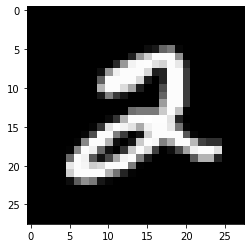

In [9]:
plt.imshow(x_train[5], cmap='gray')
plt.show

### Preparación de los datos

Estadarización del tipo de dato:

In [10]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

Transformación de los datos a vectores de 784 características:

In [11]:
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

Normalización de los datos de [0, 255] a [0, 1]:

In [12]:
x_train, x_test = x_train / 255., x_test / 255.

A continuación particionamos los datos por lotes y los mezclamos:

In [13]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### Construcción del módelo:

In [14]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

Regresión logistica de (Wx + b):

In [15]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

La función de costo en este caso sería:

In [16]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 0.9)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred),1))

La medida que se usará para determinar la calidad del modelo será:

In [17]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Para entrenar el modelo, se utilizará el optimizador definido para el gradiente estocástico:

In [18]:
optimizer = tf.optimizers.SGD(learning_rate)

In [19]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

A continuación, se ejecuta el proceso de entrenamiento:

In [20]:
display_step = 50
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step: %i, loss: %f, accuracy: %f' % (step, loss, acc))

step: 50, loss: 2.691798, accuracy: 0.707031
step: 100, loss: 2.201120, accuracy: 0.742188
step: 150, loss: 1.926627, accuracy: 0.789062
step: 200, loss: 1.788280, accuracy: 0.773438
step: 250, loss: 1.502035, accuracy: 0.812500
step: 300, loss: 1.421701, accuracy: 0.812500
step: 350, loss: 1.371978, accuracy: 0.847656
step: 400, loss: 1.382541, accuracy: 0.789062
step: 450, loss: 1.242893, accuracy: 0.847656
step: 500, loss: 1.199832, accuracy: 0.839844
step: 550, loss: 1.111963, accuracy: 0.855469
step: 600, loss: 1.156131, accuracy: 0.828125
step: 650, loss: 1.010465, accuracy: 0.871094
step: 700, loss: 0.882333, accuracy: 0.914062
step: 750, loss: 1.011202, accuracy: 0.863281
step: 800, loss: 0.971723, accuracy: 0.855469
step: 850, loss: 1.082722, accuracy: 0.832031
step: 900, loss: 0.912813, accuracy: 0.875000
step: 950, loss: 0.927843, accuracy: 0.863281
step: 1000, loss: 1.057235, accuracy: 0.820312


Finalmente se valida el modelo y se visualizan los resultados:

In [21]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.877100


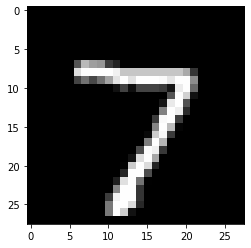

Model prediction: 7


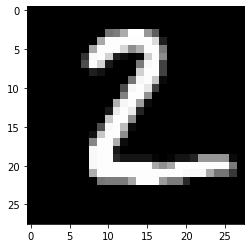

Model prediction: 2


In [22]:
n_images = 2
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

## Conclusiones

En esta ocasión se introduccido los aspectos generales de la regresión logistica multinomial como un modelo de clasificación:

* La regresión logística multinomial se puede utilizar con dos clases (por ejemplo determinar si un sentimiento es positivo o negativo) o con múltiples clases (por ejemplo la clasificación de libros de acuerdo con un genero literario).
* Se usa la función softmax para calcular probabilidades.

## Bibliografía
* Mustafa Murat Arat. 2019. [Logistic Regression in Tensorflow](https://mmuratarat.github.io/2019-01-07/logistic-regression-in-Tensorflow).
* [Andrew Ng](https://www.andrewng.org). [Machine learning course materials](http://cs229.stanford.edu/materials.html). Technical report, University of Stanford.
* Aurelien Geron. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow.
* Aymeric Damien. [TensorFlow Tutorial and Examples for Beginners (support TF v1 & v2)](https://github.com/aymericdamien/TensorFlow-Examples).

## Contacto
* Participa de la canal de Nerve a través de [Discord](https://discord.gg/edPmghPq8K).
* Se quieres conocer más acerca de este tema me puedes contactar a través de [Classgap](https://www.classgap.com/me/alejandro-sanchez-yali).